**Pressione SHIFT+ENTER para executar a célula**

# Regressão Linear Simples

Este notebook irá auxiliar você a ajustar um modelo de regressão linear "do zero" usando somente a biblioteca `numpy`.

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

#### Importando o conjunto de dados
Neste momento, vamos utilizar o conjunto de dados com duas colunas: *Horas de estudo* e *Nota final*, respectivamente.

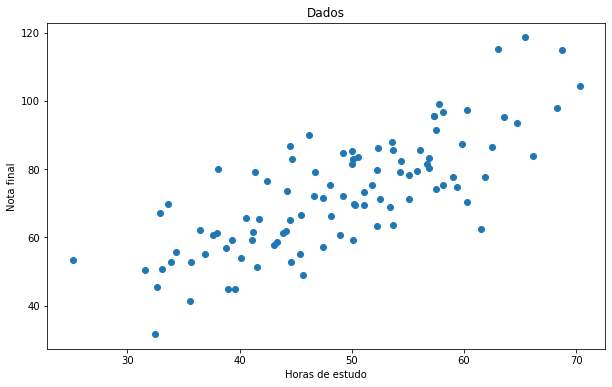

In [6]:
data = np.genfromtxt('data/data.csv', delimiter=',')

#Extrair colunas para análise
x = np.array(data[:,0])
y = np.array(data[:,1])

#Gráfico dos dados
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.xlabel('Horas de estudo')
plt.ylabel('Nota final')
plt.title('Dados')
plt.show()

#### Definição da função de custo

In [37]:
def compute_cost(theta_0, theta_1, data):
    """
    Calcula o erro quadratico medio
    
    Args:
        theta_0 (float): intercepto da reta 
        theta_1 (float): inclinacao da reta
        data (np.array): matriz com o conjunto de dados, x na coluna 0 e y na coluna 1
    
    Retorna:
        float: o erro quadratico medio
    """
    total_cost = 0

    sum_ = np.sum(np.square(theta_0 + theta_1 * data[:,0] - data[:,1]))
        
    total_cost = sum_/data.shape[0]

    return total_cost

#### Teste do Erro Quadratico Medio

Seu EQM para a reta horizontal (theta_1 = 0) interceptando y em 0 (theta_0 = 0) deve ser 5565.107834483211



In [38]:
theta_0_test = 0
theta_1_test = 0
# comparacao de floats com tolerancia 1E-11
if abs(compute_cost(theta_0_test, theta_1_test, data) - 5565.107834483211) < 1E-11:
  print("Erro Quadratico Medio passou no teste")
else:
  print("ERRO NO CALCULO DO ERRO QUADRATICO MEDIO!")

Erro Quadratico Medio passou no teste


#### Define as funções de Gradiente Descendente

In [81]:
def get_derivada(data, theta_0_current, theta_1_current, derivada_theta):
    derivada_funcao_erro = (theta_0_current + theta_1_current * data[:,0]) - data[:,1]
    return (2/data.shape[0]) * np.sum(derivada_funcao_erro * derivada_theta)

In [78]:
def step_gradient(theta_0_current, theta_1_current, data, alpha):
    """Calcula um passo em direção ao EQM mínimo
    
    Args:
        theta_0_current (float): valor atual de theta_0
        theta_1_current (float): valor atual de theta_1
        data (np.array): vetor com dados de treinamento (x,y)
        alpha (float): taxa de aprendizado / tamanho do passo 
    
    Retorna:
        tupla: (theta_0, theta_1) os novos valores de theta_0, theta_1
    """
    
    theta_0_updated = 0
    theta_1_updated = 0
    
    delta_theta_0 = get_derivada(data, theta_0_current, theta_1_current, 1)
    theta_0_updated = theta_0_current - alpha * delta_theta_0
    
    delta_theta_1 = get_derivada(data, theta_0_current, theta_1_current, data[:,0])
    theta_0_updated = theta_1_current - alpha * delta_theta_1

    return theta_0_updated, theta_1_updated

### Teste da funcao step_gradient

In [80]:
# dataset copiado do Quiz de Otimizacao Continua
other_data = np.array([
                 [1, 3],
                 [2, 4],
                 [3, 4], 
                 [4, 2]
             ])

new_theta0, new_theta1 = step_gradient(1, 1, other_data, alpha=0.1)
print(new_theta0, new_theta1)
# comparacao de floats com tolerancia 1E-11
if abs(new_theta0 - 0.95) < 1E-11:
  print("Atualizacao de theta0 OK")
else:
  print("ERRO NA ATUALIZACAO DE theta0!")

if abs(new_theta1 - 0.55) < 1E-11:
  print("Atualizacao de theta1 OK")
else:
  print("ERRO NA ATUALIZACAO DE theta1!")

0.55 0
ERRO NA ATUALIZACAO DE theta0!
ERRO NA ATUALIZACAO DE theta1!


In [ ]:
def gradient_descent(data, starting_theta_0, starting_theta_1, learning_rate, num_iterations):
    """executa a descida do gradiente
    
    Args:
        data (np.array): dados de treinamento, x na coluna 0 e y na coluna 1
        starting_theta_0 (float): valor inicial de theta0 
        starting_theta_1 (float): valor inicial de theta1
        learning_rate (float): hyperparâmetro para ajustar o tamanho do passo durante a descida do gradiente
        num_iterations (int): hyperparâmetro que decide o número de iterações que cada descida de gradiente irá executar
    
    Retorna:
        list : os primeiros dois parâmetros são o Theta0 e Theta1, que armazena o melhor ajuste da curva. O terceiro e quarto parâmetro, são vetores com o histórico dos valores para Theta0 e Theta1.
    """

    # valores iniciais
    theta_0 = starting_theta_0
    theta_1 = starting_theta_1

    
    # variável para armazenar o custo ao final de cada step_gradient
    cost_graph = []
    
    # vetores para armazenar os valores de Theta0 e Theta1 apos cada iteração de step_gradient (pred = Theta1*x + Theta0)
    theta_0_progress = []
    theta_1_progress = []
    
    # Para cada iteração, obtem novos (Theta0,Theta1) e calcula o custo (EQM)
    num_iterations = 10
    for i in range(num_iterations):
        cost_graph.append(compute_cost(theta_0, theta_1, data))
        theta_0, theta_1 = step_gradient(theta_0, theta_1, data, alpha=0.0001)
        theta_0_progress.append(theta_0)
        theta_1_progress.append(theta_1)
        
    return [theta_0, theta_1, cost_graph, theta_0_progress, theta_1_progress]

#### Executa a função gradient_descent() para obter os parâmetros otimizados, Theta0 e Theta1.

In [ ]:
theta_0, theta_1, cost_graph, theta_0_progress, theta_1_progress = gradient_descent(data, starting_theta_0=0, starting_theta_1=0, learning_rate=0, num_iterations=10)

#Imprimir parâmetros otimizados
print ('Theta_0 otimizado: ', theta_0)
print ('Theta_1 otimizado: ', theta_1)

#Imprimir erro com os parâmetros otimizados
print ('Custo minimizado: ', compute_cost(theta_0, theta_1, data))

Theta_0 otimizado:  0
Theta_1 otimizado:  0
Custo minimizado:  0


#### Gráfico do custo por iteração

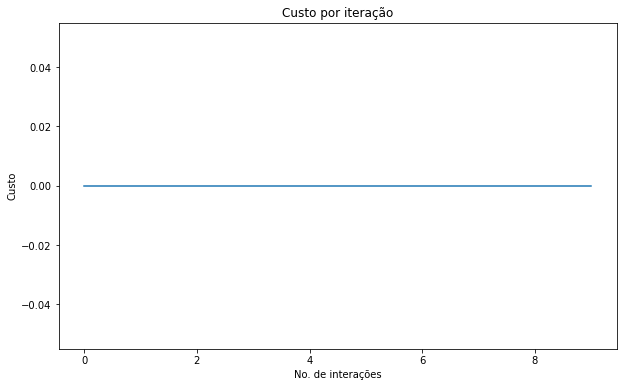

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cost_graph)
plt.xlabel('No. de interações')
plt.ylabel('Custo')
plt.title('Custo por iteração')
plt.show()

A descida do gradiente converge depois de `5` iterações (verifique !)

#### Gráfico de linha com melhor ajuste

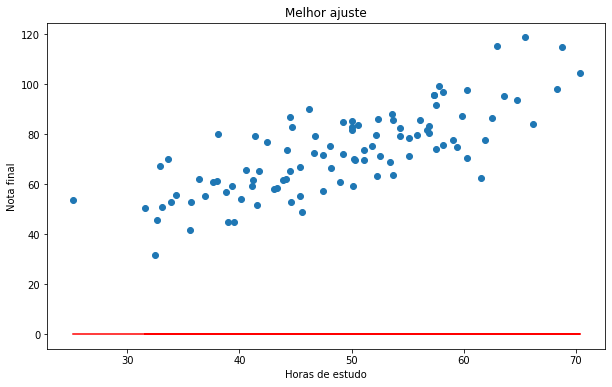

In [ ]:
#Gráfico de dispersão do conjunto de dados
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
#Valores preditos de y
pred = theta_1 * x + theta_0
#Gráfico de linha do melhor ajuste
plt.plot(x, pred, c='r')
plt.xlabel('Horas de estudo')
plt.ylabel('Nota final')
plt.title('Melhor ajuste')
plt.show()

### Progresso da descida do gradiente com o número de iterações

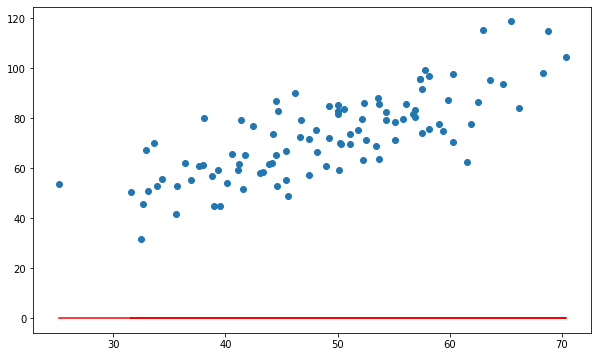

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import numpy as np


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
theta_0 = theta_0_progress[0]
theta_1 = theta_1_progress[0]
pred = theta_1*x + theta_0

line = ax.plot(x,pred, '-',c='r')[0]

def animate(i,theta_0_prog,theta_1_prog):
    pred = theta_1_prog[i] * x + theta_0_prog[i]
    line.set_data(x,pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(theta_0_progress), fargs=(theta_0_progress,theta_1_progress,))
ax.scatter(x,y)
HTML(ani.to_jshtml())